In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from drawdata import draw_scatter
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
#draw_scatter()

In [7]:
# df=pd.read_clipboard(sep=',')
# df.to_csv('data.csv')

In [8]:
df=pd.read_csv('data.csv')
x=df.iloc[:,:2].values
print(x.shape)

(349, 2)


In [9]:
class mydbscan:
    def __init__(self,eps,min_points):
        self.eps=eps
        self.min_points=min_points
        
    def pairwise_distance(self,x):
        return np.sqrt(np.sum(x**2,axis=1).reshape(-1,1)+np.sum(x**2,axis=1)-2*x@x.T)
    
    def fit(self,x):
        self.dist=self.pairwise_distance(x)
        self.core_point=[]
        for i in range(x.shape[0]):
            if np.sum(self.dist[i]<self.eps) >= self.min_points:
                self.core_point.append(i)
                
        self.cluster=np.full(x.shape[0],-1)
        self.k=0
        for i in self.core_point:
            if self.cluster[i] == -1:
                self.clustering(i)
                self.k+=1
        return self.cluster
            
    def clustering(self,index):
        if np.sum(self.dist[index] < self.eps) >= self.min_points:
            self.cluster[index]=self.k

            for i in np.where(self.dist[index] < self.eps)[0]:
                if self.cluster[i] == -1:
                    self.clustering(i)
        else:
            for i in np.where(self.dist[index] < self.eps)[0]:
                if self.cluster[i] == -1:
                    self.cluster[i]=self.k 

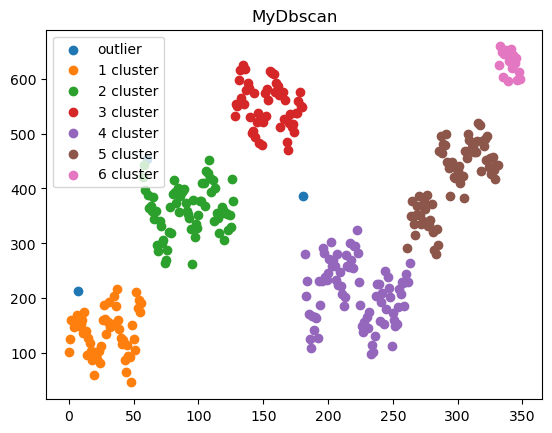

In [10]:
model=mydbscan(25,5)
cluster=model.fit(x)

for i in np.unique(cluster):
    if i==-1:
        plt.scatter(x[cluster==i][:,0], x[cluster==i][:,1], label='outlier')
        continue
    plt.scatter(x[cluster==i][:,0], x[cluster==i][:,1], label=f'{i+1} cluster')
plt.legend()
plt.title('MyDbscan')
plt.show()

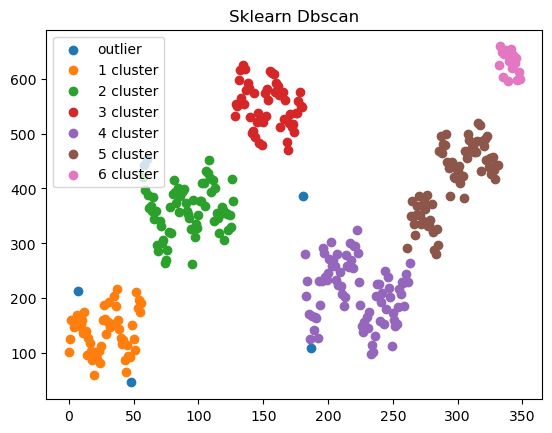

In [11]:
model=DBSCAN(eps=25,min_samples=5)
cluster=model.fit(x).labels_
for i in np.unique(cluster):
    if i==-1:
        plt.scatter(x[cluster==i][:,0], x[cluster==i][:,1], label='outlier')
        continue
    plt.scatter(x[cluster==i][:,0], x[cluster==i][:,1], label=f'{i+1} cluster')
plt.legend()
plt.title('Sklearn Dbscan')
plt.show()